# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [0]:
# TODO: code and runtime results


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd '/content/gdrive/My Drive/ieee-fraud-detection/'

/content/gdrive/My Drive/ieee-fraud-detection


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn import preprocessing 

In [0]:
tid=pd.read_csv('train_identity.csv')
ttxn=pd.read_csv('train_transaction.csv')

**Data Preprocessing**


In [0]:
tid.head()

In [0]:
ttxn.head()

In [0]:
#train = ttxn.merge(tid, on='TransactionID', how='inner')
train = ttxn.merge(tid, how='left',on='TransactionID')


In [0]:
del tid,ttxn
train.shape


(590540, 434)

In [0]:
train.head()

In [0]:
x= train.loc[:, train.columns != 'isFraud']
y= train.loc[:, train.columns == 'isFraud']


Missing Data

In [0]:
perc_nan=(train.isna().sum()/train.shape[0])*100
valuable_cols=perc_nan[perc_nan<25].index
nonv_cols=perc_nan[perc_nan>25].index

train.drop(nonv_cols,axis=1,inplace=True)
col_cont=train.describe().columns

col_cat=[i for i in train.columns if i not in train.describe().columns]

len(train.isna().sum().index)


In [0]:
for i in col_cat:
    train[i].fillna(train[i].value_counts().index[0],inplace=True)

In [0]:
for i in col_cont:
  train[i].fillna(train[i].median(),inplace=True)

In [0]:
train.shape
#train.describe()

(590540, 201)

Label Encoding

In [0]:
for i in col_cat:
    lb=sklearn.preprocessing.LabelEncoder()
    lb.fit(train[i])
    temp=lb.transform(train[i])
    train[i]=temp

In [0]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,4,13926,361.0,150.0,1,142.0,1,315.0,87.0,16,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,26.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,4,2755,404.0,150.0,2,102.0,1,325.0,87.0,16,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,4,4663,490.0,150.0,3,166.0,2,330.0,87.0,35,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,4,18132,567.0,150.0,2,117.0,2,476.0,87.0,53,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,94.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,1,4497,514.0,150.0,2,102.0,1,420.0,87.0,16,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,26.0,15.0,52.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train_fraud = train[train['isFraud']==1]
train_nonfraud = train[train['isFraud']!=1]

In [0]:
print(train_fraud.shape)
print(train_nonfraud.shape)

(20663, 201)
(569877, 201)


In [0]:
train_fraud.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
203,2987203,1,89760,445.000,4,18268,583.0,150.0,3,226.0,1,251.0,87.0,2,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,2.0,57.0,0.0,80.0,374.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,2987240,1,90193,37.098,0,13413,103.0,185.0,3,137.0,1,299.0,87.0,19,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,2987243,1,90246,37.098,0,13413,103.0,185.0,3,137.0,1,299.0,87.0,19,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,2987245,1,90295,37.098,0,13413,103.0,185.0,3,137.0,1,299.0,87.0,19,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,2987288,1,90986,155.521,0,16578,545.0,185.0,3,226.0,1,299.0,87.0,35,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,1.000000,0.014166,0.998280,0.012025,0.130306,0.010122,-0.019751,-0.010600,0.022266,-0.023129,0.085403,-0.000163,0.054401,0.012164,-0.053154,-0.055186,-0.008896,-0.057235,0.024444,-0.050376,-0.059485,-0.060490,0.033460,-0.062073,-0.054122,-0.058796,-0.017455,-0.043123,0.073179,0.087782,0.092858,0.100960,0.022454,0.028805,-0.004401,0.002153,-0.001168,0.010059,0.007757,-0.019730,...,-0.038962,-0.020320,0.020637,0.065157,-0.001732,0.059147,0.043794,0.038671,0.009286,-0.000969,0.001466,0.058846,0.055146,0.064150,0.068003,0.061972,0.069769,0.071570,-0.002939,0.002763,-0.123419,-0.075880,-0.101313,-0.001945,0.058873,0.062255,0.065518,0.007166,0.061185,-0.000007,0.039742,0.029641,0.042070,0.028834,0.057935,0.056887,0.062927,0.017677,0.053152,0.039574
isFraud,0.014166,1.000000,0.013103,0.011320,-0.156556,-0.013640,0.003343,0.154028,-0.004410,-0.032995,-0.100467,0.008768,-0.020211,-0.019334,0.030570,0.037229,-0.006833,0.030382,-0.030754,0.020909,0.028160,0.032139,-0.031703,0.028396,0.027484,0.031905,-0.011146,0.007921,-0.067103,-0.054928,-0.070583,-0.073826,-0.035199,-0.031010,0.002206,0.154755,0.151645,0.158972,0.158933,0.032710,...,0.104006,0.112606,0.035304,-0.009132,0.004406,0.020411,0.035268,0.042569,0.040145,0.020439,0.026776,-0.004501,0.004239,-0.001682,0.004154,0.002527,0.001293,-0.000309,0.025286,0.032048,0.132889,0.124274,0.131484,-0.000496,-0.001864,0.005946,0.003252,0.020253,0.011066,0.001299,0.037573,0.041443,0.038486,0.048238,-0.002961,0.005009,0.000996,0.000060,0.004959,0.001676
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.127301,0.010625,-0.019056,-0.011740,0.021393,-0.023348,0.082242,0.000057,0.049312,0.011405,-0.049318,-0.051126,-0.007546,-0.053104,0.023800,-0.046612,-0.055402,-0.056288,0.032732,-0.057734,-0.050181,-0.054738,-0.015022,-0.039721,0.072891,0.086954,0.093195,0.100847,0.025211,0.031408,-0.004513,-0.000309,-0.003285,0.008553,0.006481,-0.020578,...,-0.038522,-0.019999,0.020182,0.065567,-0.002187,0.059496,0.042890,0.037652,0.008918,-0.001210,0.001266,0.061212,0.057414,0.066788,0.070663,0.064547,0.072517,0.074406,-0.002221,0.003329,-0.119421,-0.072264,-0.097337,-0.001819,0.061252,0.064582,0.068149,0.007059,0.061214,-0.000027,0.039974,0.029211,0.042154,0.028207,0.060300,0.059212,0.065552,0.018374,0.055154,0.041066
TransactionAmt,0.012025,0.011320,0.011920,1.000000,0.147910,-0.005725,0.015942,-0.109646,-0.026434,0.003791,-0.133525,-0.011019,0.024621,-0.003377,-0.017722,-0.018468,-0.004798,-0.010148,-0.030560,-0.016982,-0.017061,-0.014820,-0.030021,-0.015958,-0.017313,-0.017135,-0.040034,-0.022435,-0.040172,-0.032520,-0.029486,-0.045208,0.067257,0.061054,0.000926,-0.130990,-0.128197,-0.115706,-0.114305,0.018757,...,0.054679,0.025750,-0.019568,-0.045774,-0.015058,-0.036346,-0.025822,-0.026062,-0.009842,-0.008628,-0.009589,-0.005055,-0.007862,-0.006261,-0.001738,0.027645,-0.000656,0.005789,0.072231,0.066307,-0.112339,-0.103599,-0.109843,0.002380,0.035331,0.029513,0.034061,0.084633,0.106196,0.054091,0.107136,0.189621,0.147606,0.176175,0.013059,0.010584,0.013409,0.128373,0.103607,0.120679
ProductCD,0.130306,-0.156556,0.127301,0.147910,1.000000,0.000165,-0.094991,-0.639116,0.075142,0.142061,0.292061,-0.034019,0.151946,0.099942,-0.079234,-0.094515,-0.009936,-0.109014,0.118239,-0.067314,-0.104377,-0.109379,0.147036,-0.110297,-0.080474,-0.104425,0.039792,-0.037709,0.232256,0.203940,0.311119,0.291455,0.241944,0.271102,0.018915,-0.770293,-0.753982,-0.694802,-0.685922,-0.180231,...,-0.234981,-0.121326,0.003856,0.137494,-0.072638,0.093586,0.064104,0.081273,-0.134691,-0.050441,-0.067517,-0.009

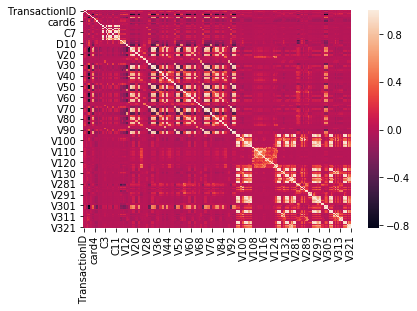

In [0]:
sns.heatmap(train.corr())


In [0]:
ques_col = ['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'addr1', 'addr2']


In [0]:
tf=train_fraud[ques_col]
tnf=train_nonfraud[ques_col]
tf.corr()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,addr1,addr2
TransactionID,1.000000,0.998281,0.040154,0.019741,0.021834,0.051481,0.005195,0.062829,0.122503
TransactionDT,0.998281,1.000000,0.039755,0.020181,0.021531,0.052189,0.004010,0.063047,0.112253
TransactionAmt,0.040154,0.039755,1.000000,0.335833,-0.041123,-0.071647,0.039159,-0.045085,0.047057
ProductCD,0.019741,0.020181,0.335833,1.000000,0.029179,0.227088,0.163103,-0.032279,0.119796
card4,0.021834,0.021531,-0.041123,0.029179,1.000000,0.201227,0.005956,0.066708,0.006090
card6,0.051481,0.052189,-0.071647,0.227088,0.201227,1.000000,0.046375,0.025937,0.047687
P_emaildomain,0.005195,0.004010,0.039159,0.163103,0.005956,0.046375,1.000000,0.012540,0.014490
addr1,0.062829,0.063047,-0.045085,-0.032279,0.066708,0.025937,0.012540,1.000000,0.025540
addr2,0.122503,0.112253,0.047057,0.119796,0.006090,0.047687,0.014490,0.025540,1.000000


In [0]:
tnf.corr()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,addr1,addr2
TransactionID,1.000000,0.998281,0.010923,0.139751,0.022351,0.088779,0.012649,-0.002133,0.051386
TransactionDT,0.998281,1.000000,0.010833,0.136385,0.021452,0.085335,0.011882,-0.001916,0.046489
TransactionAmt,0.010923,0.010833,1.000000,0.143294,-0.025857,-0.135667,-0.004375,-0.010107,0.023780
ProductCD,0.139751,0.136385,0.143294,1.000000,0.077776,0.284363,0.096037,-0.033218,0.153194
card4,0.022351,0.021452,-0.025857,0.077776,1.000000,0.203397,0.032736,0.021261,0.004087
card6,0.088779,0.085335,-0.135667,0.284363,0.203397,1.000000,0.077123,-0.005120,0.028978
P_emaildomain,0.012649,0.011882,-0.004375,0.096037,0.032736,0.077123,1.000000,-0.009207,0.010245
addr1,-0.002133,-0.001916,-0.010107,-0.033218,0.021261,-0.005120,-0.009207,1.000000,-0.003276
addr2,0.051386,0.046489,0.023780,0.153194,0.004087,0.028978,0.010245,-0.003276,1.000000


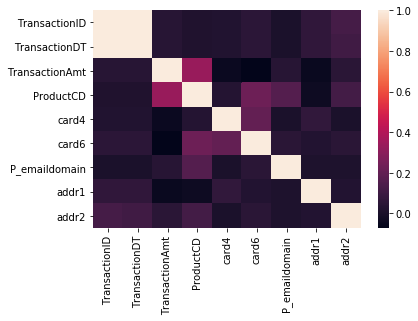

In [0]:
sns.heatmap(tf.corr())


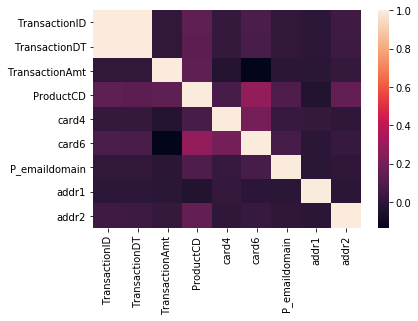

In [0]:
sns.heatmap(tnf.corr())


Distribution of **Fradulent txn(tf):**
Examining the correlations between tf and features columns, we can estimate that fradulent data is showing strong correlations between following features in decreasing order i.e. ProductCD and TransactionAMT,ProductCD and Card6, ProductCD and Card4.

Distribution of **Non Fradulent txn(tnf):**
Similarly, Examining the correlations between tnf and features columns, we can estimate that Non fradulent data is showing similar strong correlations except for ProductCD and TransactionAMT.

**Fradulent vs Non Fradulent:**
Considering the correlation maps for  both type of transaction, it can be estimated that fradulency depends relation of ProductCD and TransactionAMT. And it also depends on ProductCD and card6 i.e. Product and type of card used.

## Part 2 - Transaction Frequency

87.0    586187
Name: addr2, dtype: int64

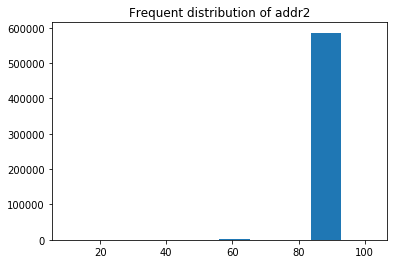

In [0]:
# TODO: code to generate the frequency graph
plt.hist(train['addr2'])
plt.title('Frequent distribution of addr2')
max_code= train['addr2'].value_counts()
max_code.head(1)


Text(0.5, 1.0, 'Frequent distribution of TransactionDT when considering frequent area code')

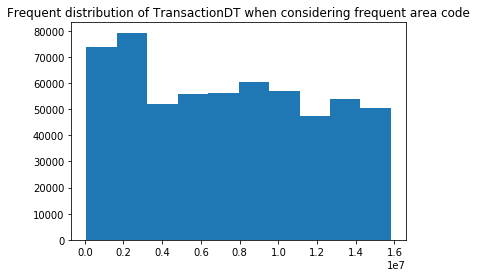

In [0]:
A=train.loc[train['addr2']==87]
A['TransactionDT']
plt.hist(A['TransactionDT'])
plt.title('Frequent distribution of TransactionDT when considering frequent area code')


Write your answer here

## Part 3 - Product Code

(array([ 2937570.763     ,        0.        ,  2416368.        ,
               0.        ,        0.        ,  6344975.        ,
               0.        ,   700813.6       ,        0.        ,
        67339221.37202102]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

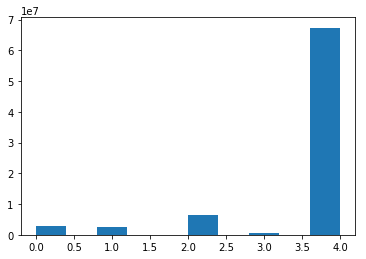

In [0]:
# TODO: code to analyze prices for different product codes
plt.hist(train['ProductCD'], weights=train['TransactionAmt'])


In [0]:
HighAmt = train.sort_values(by=['TransactionAmt'], ascending=False)
HighAmt.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
274339,3261339,0,6652391,31937.391,4,16075,514.0,150.0,2,102.0,1,205.0,87.0,53,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,33359.781250,33359.781250,33359.781250,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,31937.390625,31937.390625,31937.390625,1422.390015,1422.390015,1422.390015
274336,3261336,0,6652360,31937.391,4,16075,514.0,150.0,2,102.0,1,205.0,87.0,53,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1422.390015,1422.390015,1422.390015,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1422.390015,1422.390015,1422.390015
296021,3283021,0,7320188,6450.970,4,16661,490.0,150.0,3,226.0,2,327.0,87.0,53,4.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,13.0,4.0,62.0,223.0,439.0,247.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,115.900002,115.900002,115.900002,57.950001,57.950001,0.0,57.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,57.950001,57.950001,57.950001
248413,3235413,0,5926506,6085.230,4,2755,404.0,150.0,2,102.0,1,204.0,87.0,16,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
384603,3371603,0,9648912,5543.230,4,11106,100.0,150.0,3,226.0,1,315.0,87.0,31,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Clearly, ProductCD = W(4) is the most expensive product which has the highest bar in histogram with highest total Transaction Amount(TransactionAMT)=67339221.37202102.And also we can see from table above that highest TransactionAmt=31937.391 is corresponding to ProductCD =4 which is ProductCD = W.

## Part 4 - Correlation Coefficient

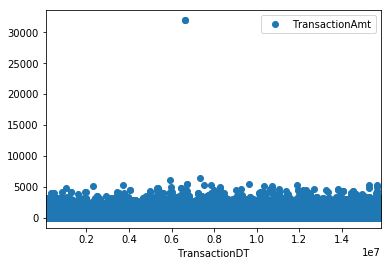

In [0]:
train.plot(x='TransactionDT', y='TransactionAmt', style='o')

In [0]:
# TODO: code to calculate correlation coefficient
train.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,1.000000,0.014166,0.998280,0.012025,0.130306,0.010122,-0.019751,-0.010600,0.022266,-0.023129,0.085403,-0.000163,0.054401,0.012164,-0.053154,-0.055186,-0.008896,-0.057235,0.024444,-0.050376,-0.059485,-0.060490,0.033460,-0.062073,-0.054122,-0.058796,-0.017455,-0.043123,0.073179,0.087782,0.092858,0.100960,0.022454,0.028805,-0.004401,0.002153,-0.001168,0.010059,0.007757,-0.019730,...,-0.038962,-0.020320,0.020637,0.065157,-0.001732,0.059147,0.043794,0.038671,0.009286,-0.000969,0.001466,0.058846,0.055146,0.064150,0.068003,0.061972,0.069769,0.071570,-0.002939,0.002763,-0.123419,-0.075880,-0.101313,-0.001945,0.058873,0.062255,0.065518,0.007166,0.061185,-0.000007,0.039742,0.029641,0.042070,0.028834,0.057935,0.056887,0.062927,0.017677,0.053152,0.039574
isFraud,0.014166,1.000000,0.013103,0.011320,-0.156556,-0.013640,0.003343,0.154028,-0.004410,-0.032995,-0.100467,0.008768,-0.020211,-0.019334,0.030570,0.037229,-0.006833,0.030382,-0.030754,0.020909,0.028160,0.032139,-0.031703,0.028396,0.027484,0.031905,-0.011146,0.007921,-0.067103,-0.054928,-0.070583,-0.073826,-0.035199,-0.031010,0.002206,0.154755,0.151645,0.158972,0.158933,0.032710,...,0.104006,0.112606,0.035304,-0.009132,0.004406,0.020411,0.035268,0.042569,0.040145,0.020439,0.026776,-0.004501,0.004239,-0.001682,0.004154,0.002527,0.001293,-0.000309,0.025286,0.032048,0.132889,0.124274,0.131484,-0.000496,-0.001864,0.005946,0.003252,0.020253,0.011066,0.001299,0.037573,0.041443,0.038486,0.048238,-0.002961,0.005009,0.000996,0.000060,0.004959,0.001676
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.127301,0.010625,-0.019056,-0.011740,0.021393,-0.023348,0.082242,0.000057,0.049312,0.011405,-0.049318,-0.051126,-0.007546,-0.053104,0.023800,-0.046612,-0.055402,-0.056288,0.032732,-0.057734,-0.050181,-0.054738,-0.015022,-0.039721,0.072891,0.086954,0.093195,0.100847,0.025211,0.031408,-0.004513,-0.000309,-0.003285,0.008553,0.006481,-0.020578,...,-0.038522,-0.019999,0.020182,0.065567,-0.002187,0.059496,0.042890,0.037652,0.008918,-0.001210,0.001266,0.061212,0.057414,0.066788,0.070663,0.064547,0.072517,0.074406,-0.002221,0.003329,-0.119421,-0.072264,-0.097337,-0.001819,0.061252,0.064582,0.068149,0.007059,0.061214,-0.000027,0.039974,0.029211,0.042154,0.028207,0.060300,0.059212,0.065552,0.018374,0.055154,0.041066
TransactionAmt,0.012025,0.011320,0.011920,1.000000,0.147910,-0.005725,0.015942,-0.109646,-0.026434,0.003791,-0.133525,-0.011019,0.024621,-0.003377,-0.017722,-0.018468,-0.004798,-0.010148,-0.030560,-0.016982,-0.017061,-0.014820,-0.030021,-0.015958,-0.017313,-0.017135,-0.040034,-0.022435,-0.040172,-0.032520,-0.029486,-0.045208,0.067257,0.061054,0.000926,-0.130990,-0.128197,-0.115706,-0.114305,0.018757,...,0.054679,0.025750,-0.019568,-0.045774,-0.015058,-0.036346,-0.025822,-0.026062,-0.009842,-0.008628,-0.009589,-0.005055,-0.007862,-0.006261,-0.001738,0.027645,-0.000656,0.005789,0.072231,0.066307,-0.112339,-0.103599,-0.109843,0.002380,0.035331,0.029513,0.034061,0.084633,0.106196,0.054091,0.107136,0.189621,0.147606,0.176175,0.013059,0.010584,0.013409,0.128373,0.103607,0.120679
ProductCD,0.130306,-0.156556,0.127301,0.147910,1.000000,0.000165,-0.094991,-0.639116,0.075142,0.142061,0.292061,-0.034019,0.151946,0.099942,-0.079234,-0.094515,-0.009936,-0.109014,0.118239,-0.067314,-0.104377,-0.109379,0.147036,-0.110297,-0.080474,-0.104425,0.039792,-0.037709,0.232256,0.203940,0.311119,0.291455,0.241944,0.271102,0.018915,-0.770293,-0.753982,-0.694802,-0.685922,-0.180231,...,-0.234981,-0.121326,0.003856,0.137494,-0.072638,0.093586,0.064104,0.081273,-0.134691,-0.050441,-0.067517,-0.009

Correlation between TransactionDT and TransactionAmt = 0.011920


## Part 5 - Interesting Plot

(array([16079.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 26281.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

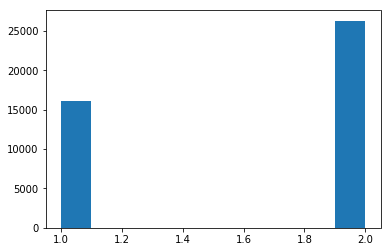

In [0]:
# TODO: code to generate the plot here.
#train.plot(x='ProductCD', y='card6', style='o')
plt.hist(train_fraud['card6'], weights=train_fraud['ProductCD'])

So, we can notice that  **Most of the Fraud transactions are done using credit cards**(card6,3). 

In [0]:
train_fraud.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,1.000000,NaN,0.998281,0.040154,0.019741,0.035487,-0.012942,0.013300,0.021834,0.012525,0.051481,0.062829,0.122503,0.005195,-0.094662,-0.095372,0.015795,-0.093842,0.033929,-0.089794,-0.116338,-0.109346,0.047327,-0.116889,-0.097200,-0.115066,-0.099583,-0.089032,-0.004386,0.012998,-0.002119,0.016564,-0.031736,-0.032975,-0.001249,0.046205,0.034065,0.036036,0.026952,-0.001370,...,0.009150,-0.003657,0.006808,0.032581,-0.005293,0.013041,0.017018,0.013616,-0.017040,-0.038922,-0.033806,-0.023879,-0.043284,-0.041539,-0.052823,-0.026640,-0.050870,-0.041389,-0.017134,-0.014528,0.000517,-0.011240,-0.007626,NaN,-0.011516,-0.043024,-0.033415,0.001637,0.025607,0.001139,0.024883,0.053992,0.048463,0.049918,-0.011004,-0.047747,-0.042316,-0.006949,-0.013793,-0.010723
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionDT,0.998281,NaN,1.000000,0.039755,0.020181,0.035200,-0.013430,0.013862,0.021531,0.013876,0.052189,0.063047,0.112253,0.004010,-0.086404,-0.086979,0.017304,-0.085416,0.034096,-0.081349,-0.107599,-0.100725,0.048255,-0.107801,-0.088675,-0.106451,-0.090701,-0.080579,-0.003923,0.013041,-0.002528,0.016440,-0.029068,-0.030590,-0.001943,0.044041,0.032888,0.034033,0.025486,-0.002980,...,0.007938,-0.004274,0.006418,0.033256,-0.006083,0.012801,0.016293,0.012776,-0.016076,-0.037953,-0.032502,-0.022999,-0.042308,-0.040206,-0.051050,-0.027028,-0.049241,-0.040730,-0.017626,-0.015270,-0.000906,-0.012153,-0.008565,NaN,-0.012130,-0.042382,-0.032641,0.000845,0.025256,0.000189,0.024552,0.053909,0.048720,0.049443,-0.011062,-0.046948,-0.041179,-0.008089,-0.014422,-0.011508
TransactionAmt,0.040154,NaN,0.039755,1.000000,0.335833,0.018249,0.076129,-0.306624,-0.041123,0.050029,-0.071647,-0.045085,0.047057,0.039159,-0.038292,-0.046166,-0.003969,-0.026207,0.003729,-0.023327,-0.045780,-0.041985,0.025226,-0.038245,-0.033503,-0.050382,-0.027955,-0.016254,0.025302,-0.010688,0.076495,0.030484,0.227496,0.218139,0.006322,-0.314595,-0.308902,-0.247725,-0.245429,-0.036569,...,0.030187,0.033277,0.021374,0.005334,-0.004253,0.039956,0.078803,0.055280,-0.028895,-0.021361,-0.023938,-0.002671,-0.018673,-0.010292,0.000524,0.018032,0.005998,0.016333,0.034720,0.039445,-0.254012,-0.232608,-0.247316,NaN,0.297656,0.118149,0.256415,0.179194,0.275196,0.087440,0.322097,0.343491,0.310704,0.330525,0.234173,0.072723,0.179179,0.180773,0.141249,0.186528
ProductCD,0.019741,NaN,0.020181,0.335833,1.000000,0.056180,0.066633,-0.787141,0.029179,0.246144,0.227088,-0.032279,0.119796,0.163103,-0.120832,-0.139861,-0.005490,-0.106612,0.115025,-0.091146,-0.115765,-0.121128,0.213382,-0.110410,-0.110196,-0.126586,-0.033782,-0.064664,0.234263,0.172724,0.375511,0.302179,0.559211,0.586979,-0.003399,-0.811216,-0.796160,-0.628957,-0.617721,-0.202163,...,0.041823,0.153977,0.241937,0.402650,0.061535,0.389428,0.324054,0.331574,-0.070795,-0.051558,-0.054889,0.051347,-0.028383,0.001532,0.076087,0.079828,0.090352,0.101709,0.044772,0.078119,-0.787554,-0.659226,-0.743168,NaN,0.207792,0.079996,0.189352,0.202077,0.342300,0.087397,0.320052,0.274569,0.289534,0.280361,0.151402,0.023675,0.113023,0.094057,0.133904,0.132691
card1,0.035487,NaN,0.035200,0.018249,0.056180,1.000000,-0.000299,-0.060915,0.095378,-0.057115,0.050264,0.008187,0.018599,-0.021411,0.005537,0.003476,0.008143,0.008546,-0.017264,0.007509,0.0064

(array([  418.,     0.,     0.,  1732.,     0.,     0., 11511.,     0.,
            0., 28699.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

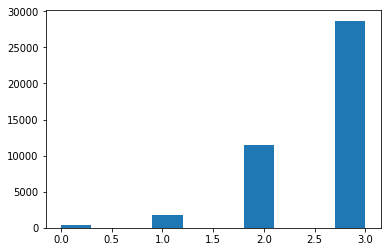

In [0]:
plt.hist(train_fraud['card4'], weights=train_fraud['ProductCD'])

In [0]:
Highcardt = train.sort_values(by=['card6'], ascending=False)
Highcardt.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
225017,3212017,0,5324708,25.95,4,2572,555.0,150.0,2,117.0,3,225.0,87.0,16,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,26.0,2.0,284.0,520.0,520.0,520.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,81.900002,30.950001,0.0,81.900002,0.0,30.950001,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
43216,3030216,0,1036297,58.43,4,4648,555.0,150.0,2,117.0,3,110.0,87.0,16,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,7.0,7.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,58.509998,58.509998,0.0,58.509998,0.0,58.509998,58.509998,58.509998,58.509998,0.0,0.0,0.0,0.0,0.0,0.0
16408,3003408,0,435569,58.51,4,4648,555.0,150.0,2,117.0,3,110.0,87.0,16,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
340607,3327607,0,8381128,280.00,4,2572,555.0,150.0,2,117.0,3,225.0,87.0,53,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
376300,3363300,0,9405509,57.95,4,4648,555.0,150.0,2,117.0,3,110.0,87.0,16,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,7.0,1.0,103.0,104.0,104.0,104.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Part 6 - Prediction Model

In [0]:
train.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,1.000000,0.014166,0.998280,0.012025,0.130306,0.010122,-0.019751,-0.010600,0.022266,-0.023129,0.085403,-0.000163,0.054401,0.012164,-0.053154,-0.055186,-0.008896,-0.057235,0.024444,-0.050376,-0.059485,-0.060490,0.033460,-0.062073,-0.054122,-0.058796,-0.017455,-0.043123,0.073179,0.092858,0.100960,0.022454,0.028805,-0.004401,0.002153,-0.001168,0.010059,0.007757,-0.019730,-0.020091,...,-0.038962,-0.020320,0.020637,0.065157,-0.001732,0.059147,0.043794,0.038671,0.009286,-0.000969,0.001466,0.058846,0.055146,0.064150,0.068003,0.061972,0.069769,0.071570,-0.002939,0.002763,-0.123419,-0.075880,-0.101313,-0.001945,0.058873,0.062255,0.065518,0.007166,0.061185,-0.000007,0.039742,0.029641,0.042070,0.028834,0.057935,0.056887,0.062927,0.017677,0.053152,0.039574
isFraud,0.014166,1.000000,0.013103,0.011320,-0.156556,-0.013640,0.003343,0.154028,-0.004410,-0.032995,-0.100467,0.008768,-0.020211,-0.019334,0.030570,0.037229,-0.006833,0.030382,-0.030754,0.020909,0.028160,0.032139,-0.031703,0.028396,0.027484,0.031905,-0.011146,0.007921,-0.067103,-0.070583,-0.073826,-0.035199,-0.031010,0.002206,0.154755,0.151645,0.158972,0.158933,0.032710,0.040118,...,0.104006,0.112606,0.035304,-0.009132,0.004406,0.020411,0.035268,0.042569,0.040145,0.020439,0.026776,-0.004501,0.004239,-0.001682,0.004154,0.002527,0.001293,-0.000309,0.025286,0.032048,0.132889,0.124274,0.131484,-0.000496,-0.001864,0.005946,0.003252,0.020253,0.011066,0.001299,0.037573,0.041443,0.038486,0.048238,-0.002961,0.005009,0.000996,0.000060,0.004959,0.001676
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.127301,0.010625,-0.019056,-0.011740,0.021393,-0.023348,0.082242,0.000057,0.049312,0.011405,-0.049318,-0.051126,-0.007546,-0.053104,0.023800,-0.046612,-0.055402,-0.056288,0.032732,-0.057734,-0.050181,-0.054738,-0.015022,-0.039721,0.072891,0.093195,0.100847,0.025211,0.031408,-0.004513,-0.000309,-0.003285,0.008553,0.006481,-0.020578,-0.020722,...,-0.038522,-0.019999,0.020182,0.065567,-0.002187,0.059496,0.042890,0.037652,0.008918,-0.001210,0.001266,0.061212,0.057414,0.066788,0.070663,0.064547,0.072517,0.074406,-0.002221,0.003329,-0.119421,-0.072264,-0.097337,-0.001819,0.061252,0.064582,0.068149,0.007059,0.061214,-0.000027,0.039974,0.029211,0.042154,0.028207,0.060300,0.059212,0.065552,0.018374,0.055154,0.041066
TransactionAmt,0.012025,0.011320,0.011920,1.000000,0.147910,-0.005725,0.015942,-0.109646,-0.026434,0.003791,-0.133525,-0.011019,0.024621,-0.003377,-0.017722,-0.018468,-0.004798,-0.010148,-0.030560,-0.016982,-0.017061,-0.014820,-0.030021,-0.015958,-0.017313,-0.017135,-0.040034,-0.022435,-0.040172,-0.029486,-0.045208,0.067257,0.061054,0.000926,-0.130990,-0.128197,-0.115706,-0.114305,0.018757,0.015164,...,0.054679,0.025750,-0.019568,-0.045774,-0.015058,-0.036346,-0.025822,-0.026062,-0.009842,-0.008628,-0.009589,-0.005055,-0.007862,-0.006261,-0.001738,0.027645,-0.000656,0.005789,0.072231,0.066307,-0.112339,-0.103599,-0.109843,0.002380,0.035331,0.029513,0.034061,0.084633,0.106196,0.054091,0.107136,0.189621,0.147606,0.176175,0.013059,0.010584,0.013409,0.128373,0.103607,0.120679
ProductCD,0.130306,-0.156556,0.127301,0.147910,1.000000,0.000165,-0.094991,-0.639116,0.075142,0.142061,0.292061,-0.034019,0.151946,0.099942,-0.079234,-0.094515,-0.009936,-0.109014,0.118239,-0.067314,-0.104377,-0.109379,0.147036,-0.110297,-0.080474,-0.104425,0.039792,-0.037709,0.232256,0.311119,0.291455,0.241944,0.271102,0.018915,-0.770293,-0.753982,-0.694802,-0.685922,-0.180231,-0.139580,...,-0.234981,-0.121326,0.003856,0.137494,-0.072638,0.093586,0.064104,0.081273,-0.134691,-0.050441,-0.067517,-0.0

In [0]:
# TODO: code for your final model
train_x= train.drop(['isFraud'],axis = 1)
train_y=train['isFraud']
#Separated the isFraud column from test data.

In [0]:
from sklearn.model_selection import train_test_split
train_X,test_X, train_y,test_y=train_test_split(train_x,train_y,test_size=0.2,random_state=121)#split the train data into two parts to train the model i.e. 80 and 20
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(472432, 200) (118108, 200) (472432,) (118108,)


Using Logistic Regression for prediction

In [0]:
from sklearn.linear_model import LogisticRegression                                 
from sklearn.metrics import accuracy_score
LR = LogisticRegression()
LR.fit(train_X,train_y)
LR.predict(test_X)
      
print("\n\naccuracy_score using DT : ",accuracy_score(test_y,LR.predict(test_X)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




accuracy_score using DT :  0.9648965353744031


Accuracy of this LR Model is accuracy_score using DT :  0.9648965353744031

Importing Test datasets

In [0]:
test_id=pd.read_csv('test_identity.csv')
test_txn=pd.read_csv('test_transaction.csv')

Merging Test datasets

In [0]:
test = test_txn.merge(test_id, how='left',on='TransactionID')


In [0]:
test.shape

(506691, 433)

Dealing with Missing Values

In [0]:
perc_nan=(test.isna().sum()/test.shape[0])*100
valuable_cols=perc_nan[perc_nan<25].index
nonv_cols=perc_nan[perc_nan>25].index

test.drop(nonv_cols,axis=1,inplace=True)
col_cont=test.describe().columns

col_cat=[i for i in test.columns if i not in test.describe().columns]

len(test.isna().sum().index)


200

In [0]:
for i in col_cat:
    test[i].fillna(test[i].value_counts().index[0],inplace=True)

In [0]:
for i in col_cont:
  test[i].fillna(test[i].median(),inplace=True)

Label Encoding for test Datasets

In [0]:
for i in col_cat:
    lb=sklearn.preprocessing.LabelEncoder()
    lb.fit(test[i])
    temp=lb.transform(test[i])
    test[i]=temp

Write your answer here

## Part 7 - Final Result

In [0]:
pr=LR.predict(test)

In [0]:
pr=pr.astype(float)

In [0]:
Pred=pd.DataFrame([test['TransactionID']]).T
Pred['isFraud']=pr

In [0]:
Pred.head()

,TransactionID,isFraud
0,3663549,0.0
1,3663550,0.0
2,3663551,0.0
3,3663552,0.0
4,3663553,0.0


In [0]:
Pred.to_csv('submission.csv',index = False)

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/rorawat

Highest Rank: 

Score: **0.5000**

Number of entries: 1 

![leaderboard](https://drive.google.com/open?id=14gJbNKcxD7nfOjAcxT_08iJWyE-jgdJv)